In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
%matplotlib inline

params = {'legend.fontsize': 'x-large',
          'lines.linewidth': 0.75,
      'figure.figsize': (15, 7),
          'grid.color': 'white',
          'axes.axisbelow': False,
          'axes.grid': True,
          'axes.grid.axis': 'y',
     'axes.labelsize': 'x-large',
     'axes.titlesize':'xx-large',
     'xtick.labelsize':'x-large',
     'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
figsize=(15,7)

In [165]:
df = pd.read_csv('final_df.csv')
df.head()

,Unnamed: 0,hourly_demand,temp,dwpt,rhum,wspd,hour_of_day,year,month,day_of_week,day_of_year,week_of_year,quarter,stat_hol,daily_peak
0,2005-01-01 01:00:00,23715.488663,64.4,64.4,100.0,4.722420,1,2005,1,5,1,53,1,True,28637.089643
1,2005-01-01 02:00:00,22823.712923,64.4,64.4,100.0,6.959355,2,2005,1,5,1,53,1,True,28637.089643
2,2005-01-01 03:00:00,21882.924807,64.4,64.4,100.0,5.840887,3,2005,1,5,1,53,1,True,28637.089643
3,2005-01-01 04:00:00,21229.184273,62.6,62.6,100.0,8.077823,4,2005,1,5,1,53,1,True,28637.089643
4,2005-01-01 05:00:00,20940.912981,62.6,62.6,100.0,4.722420,5,2005,1,5,1,53,1,True,28637.089643


In [166]:
df.set_index('Unnamed: 0', inplace=True)

In [167]:
df.index.name = None

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141672 entries, 2005-01-01 01:00:00 to 2021-03-01 00:00:00
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hourly_demand  141672 non-null  float64
 1   temp           141672 non-null  float64
 2   dwpt           141672 non-null  float64
 3   rhum           141672 non-null  float64
 4   wspd           141672 non-null  float64
 5   hour_of_day    141672 non-null  int64  
 6   year           141672 non-null  int64  
 7   month          141672 non-null  int64  
 8   day_of_week    141672 non-null  int64  
 9   day_of_year    141672 non-null  int64  
 10  week_of_year   141672 non-null  int64  
 11  quarter        141672 non-null  int64  
 12  stat_hol       141672 non-null  bool   
 13  daily_peak     141672 non-null  float64
dtypes: bool(1), float64(6), int64(7)
memory usage: 15.3+ MB


In [169]:
daymapper = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
weekdaymapper = {0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday',
                 5: 'Weekend', 6: 'Weekend'}
df['dayofweek'] = df['day_of_week'].map(daymapper)
df['daytype'] = df['day_of_week'].map(weekdaymapper)

In [157]:
df.head()

,hourly_demand,temp,dwpt,rhum,wspd,hour_of_day,year,month,day_of_week,day_of_year,week_of_year,quarter,stat_hol,daily_peak,dayofweek,daytype
2005-01-01 01:00:00,23715.488663,64.4,64.4,100.0,4.722420,1,2005,1,5,1,53,1,True,28637.089643,Sat,Weekend
2005-01-01 02:00:00,22823.712923,64.4,64.4,100.0,6.959355,2,2005,1,5,1,53,1,True,28637.089643,Sat,Weekend
2005-01-01 03:00:00,21882.924807,64.4,64.4,100.0,5.840887,3,2005,1,5,1,53,1,True,28637.089643,Sat,Weekend
2005-01-01 04:00:00,21229.184273,62.6,62.6,100.0,8.077823,4,2005,1,5,1,53,1,True,28637.089643,Sat,Weekend
2005-01-01 05:00:00,20940.912981,62.6,62.6,100.0,4.722420,5,2005,1,5,1,53,1,True,28637.089643,Sat,Weekend


In [171]:
df.to_csv('final_df_1.csv')

In [8]:
df.index = pd.to_datetime(df.index)

In [9]:
df.index

DatetimeIndex(['2005-01-01 01:00:00', '2005-01-01 02:00:00',
               '2005-01-01 03:00:00', '2005-01-01 04:00:00',
               '2005-01-01 05:00:00', '2005-01-01 06:00:00',
               '2005-01-01 07:00:00', '2005-01-01 08:00:00',
               '2005-01-01 09:00:00', '2005-01-01 10:00:00',
               ...
               '2021-02-28 15:00:00', '2021-02-28 16:00:00',
               '2021-02-28 17:00:00', '2021-02-28 18:00:00',
               '2021-02-28 19:00:00', '2021-02-28 20:00:00',
               '2021-02-28 21:00:00', '2021-02-28 22:00:00',
               '2021-02-28 23:00:00', '2021-03-01 00:00:00'],
              dtype='datetime64[ns]', length=141672, freq=None)

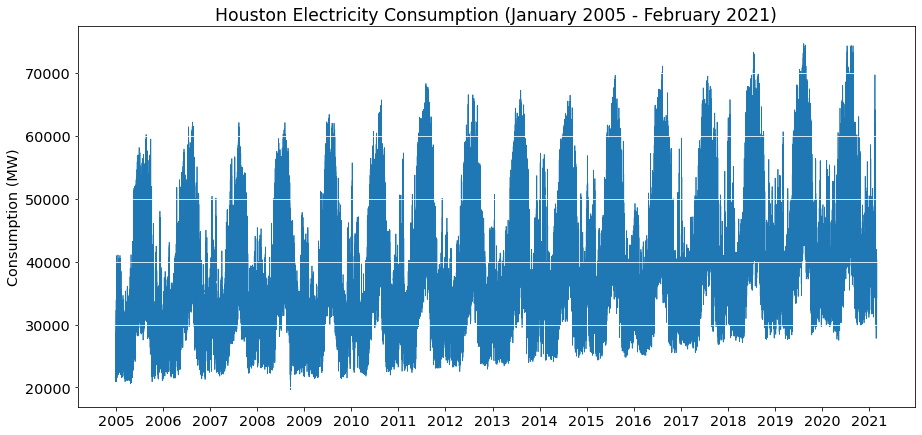

In [20]:
fig, ax = plt.subplots()
years = mdates.YearLocator()   
years_fmt = mdates.DateFormatter('%Y')
ax.plot(df['hourly_demand'])
ax.set_ylabel('Consumption (MW)')
ax.set_title('Houston Electricity Consumption (January 2005 - February 2021)')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt);

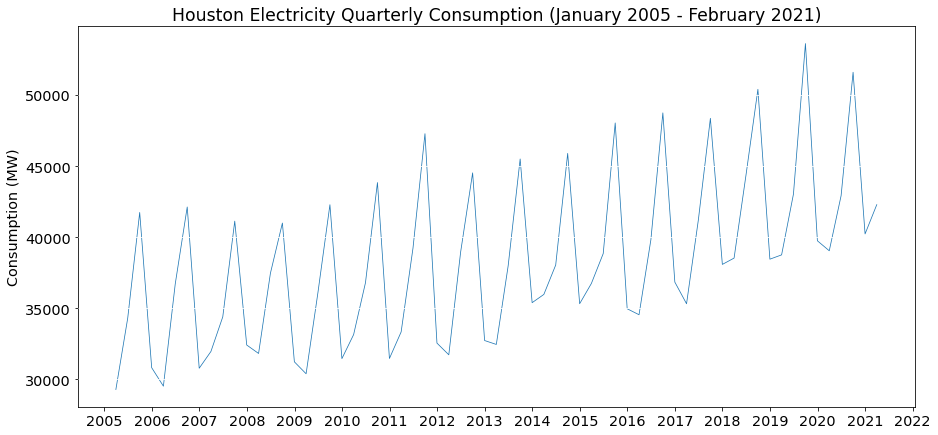

In [19]:
fig, ax = plt.subplots()
years = mdates.YearLocator()   
years_fmt = mdates.DateFormatter('%Y')
quart = df['hourly_demand'].resample('Q').mean()
ax.plot(quart)
ax.set_ylabel('Consumption (MW)')
ax.set_title('Houston Electricity Quarterly Consumption (January 2005 - February 2021)')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt);

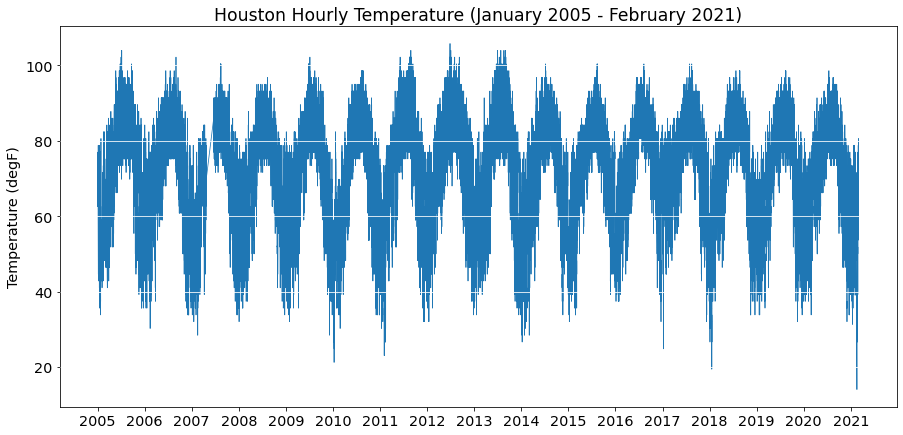

In [21]:
fig, ax = plt.subplots()
years = mdates.YearLocator()   
years_fmt = mdates.DateFormatter('%Y')
ax.plot(df['temp'])
ax.set_ylabel('Temperature (degF)')
ax.set_title('Houston Hourly Temperature (January 2005 - February 2021)')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt);

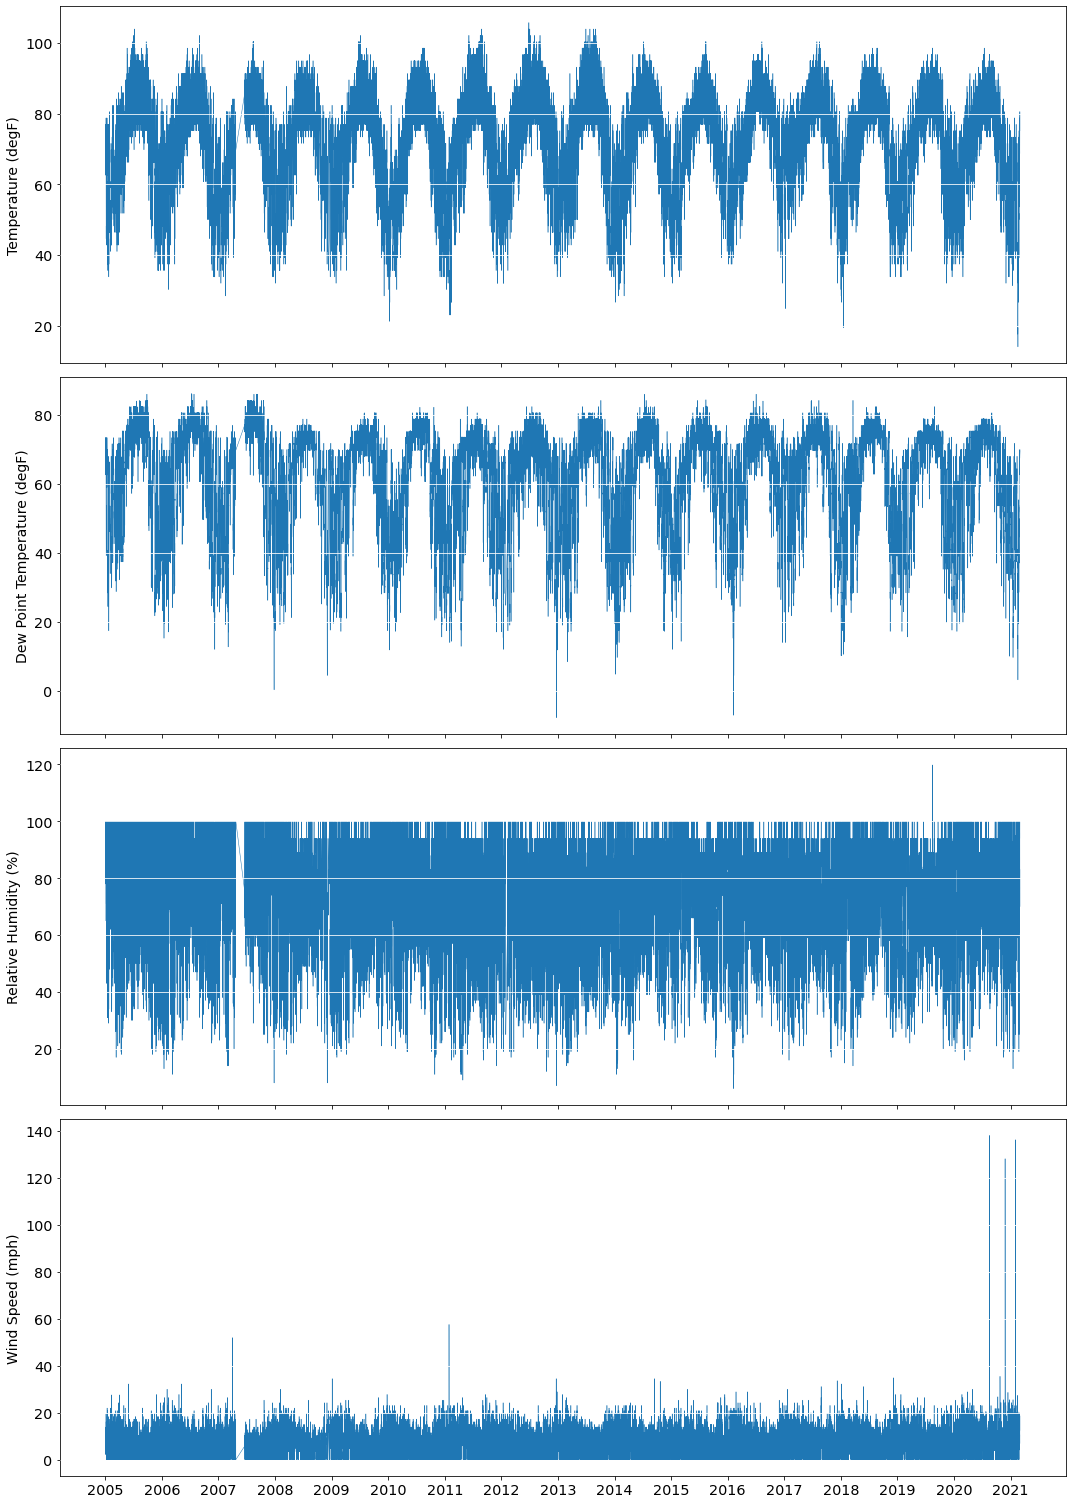

In [69]:
months = mdates.MonthLocator()   
months_fmt = mdates.DateFormatter('%b')
weather = df[['temp', 'dwpt', 'rhum', 'wspd']]

ylabels = ['Temperature (degF)', 'Dew Point Temperature (degF)',
           'Relative Humidity (%)', 'Wind Speed (mph)']

fig, axes = plt.subplots(nrows=len(weather.columns), ncols=1,
                       frameon=False, figsize = (figsize[0],figsize[1]*3),
                       sharex=True)
years = mdates.YearLocator()   
years_fmt = mdates.DateFormatter('%Y')

for ax, col, ylabel in zip(axes, weather.columns, ylabels):
    ax.plot(weather[col], linewidth=0.5)
    ax.set_ylabel(ylabel, fontsize=14)

    ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
plt.tight_layout();

In [13]:
df_2015 = df.loc['2015', :].copy()
df_2015.head()

,hourly_demand,temp,dwpt,rhum,wspd,hour_of_day,year,month,day_of_week,day_of_year,week_of_year,quarter,stat_hol,daily_peak,dayofweek,daytype
2015-01-01 00:00:00,40707.660350,46.4,37.58,71.0,12.085666,0,2015,1,3,1,1,1,True,45777.740659,Thu,Weekday
2015-01-01 01:00:00,39624.861027,46.4,37.58,71.0,13.856573,1,2015,1,3,1,1,1,True,45777.740659,Thu,Weekday
2015-01-01 02:00:00,39013.544802,46.4,37.58,71.0,13.856573,2,2015,1,3,1,1,1,True,45777.740659,Thu,Weekday
2015-01-01 03:00:00,38566.541927,44.6,37.58,76.0,10.314759,3,2015,1,3,1,1,1,True,45777.740659,Thu,Weekday
2015-01-01 04:00:00,38488.338511,44.6,37.58,76.0,10.873992,4,2015,1,3,1,1,1,True,45777.740659,Thu,Weekday


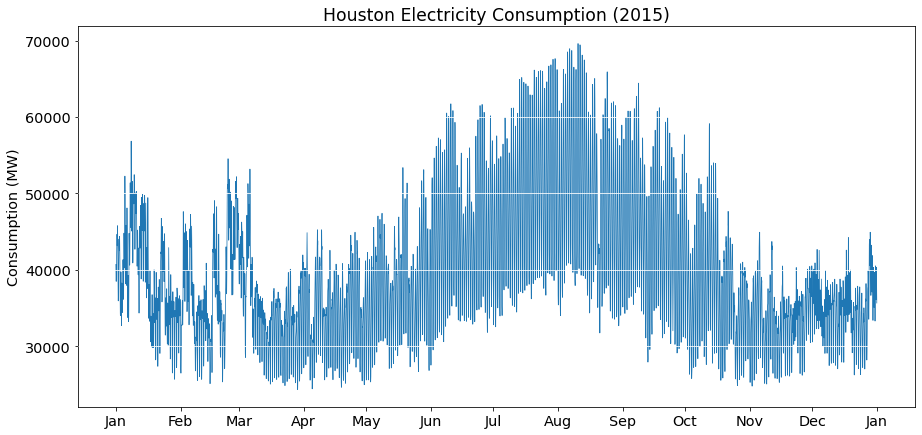

In [22]:
fig, ax = plt.subplots()
months = mdates.MonthLocator()   
months_fmt = mdates.DateFormatter('%b')
ax.plot(df_2015['hourly_demand'])
ax.set_ylabel('Consumption (MW)')
ax.set_title('Houston Electricity Consumption (2015)')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt);

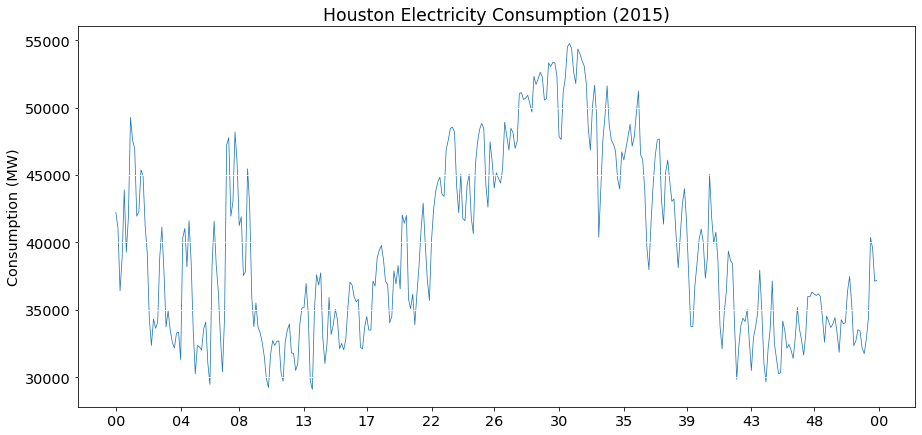

In [27]:
fig, ax = plt.subplots()
months = mdates.MonthLocator()
weeks_fmt = mdates.DateFormatter('%W')
daily = df_2015['hourly_demand'].resample('D').mean()
ax.plot(daily)
ax.set_ylabel('Consumption (MW)')
ax.set_title('Houston Electricity Consumption (2015)')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(weeks_fmt);

In [62]:
df_2015_hours = df_2015.pivot(index='hour_of_day', columns='day_of_year', values='hourly_demand')
df_2015_hours.index = df_2015.loc['2015-01-01'].index
df_2015_hours.head()

day_of_year,1,2,3,4,5,6,7,8,9,10,...,356,357,358,359,360,361,362,363,364,365
2015-01-01 00:00:00,40707.660350,39144.775930,37611.257990,36107.801890,41281.012450,39990.480790,34589.273130,46668.407290,43714.321930,45505.568570,...,31013.134410,31650.902170,30462.925620,31208.508800,30964.474940,32303.680720,35425.238750,39184.681610,35783.507110,35517.364870
2015-01-01 01:00:00,39624.861027,37501.728517,35851.588808,35041.743465,40399.532445,38606.519792,33525.098893,45712.104562,42087.048995,43941.043459,...,29160.686107,29537.627214,28453.242523,29630.689134,29342.429637,30523.155957,34288.711358,37722.225551,34364.635875,34170.524024
2015-01-01 02:00:00,39013.544802,36419.015557,34917.548550,34570.190033,40252.995979,38006.099709,33214.629978,45569.574427,41224.453708,43098.792212,...,28012.616780,28193.091736,27200.665725,28486.792071,28169.499857,29255.504959,33658.691346,36969.285809,33676.665913,33528.562054
2015-01-01 03:00:00,38566.541927,35934.146285,34292.877894,34418.974941,40642.107046,37967.976996,33402.187199,45891.392403,40894.727330,42694.146834,...,27603.110921,27401.707452,26478.648955,27650.276284,27419.553117,28479.319512,33532.453676,36651.320664,33390.188890,33298.115732
2015-01-01 04:00:00,38488.338511,35954.713759,33993.740791,34643.097371,41485.476448,38405.230979,33986.918105,46603.380321,41089.492565,42775.665280,...,27706.161739,27062.577941,26284.021501,27211.922637,27032.388040,28191.613592,34057.838152,36742.898110,33578.370351,33596.932100


Text(0, 0.5, 'Megawatts (MW)')

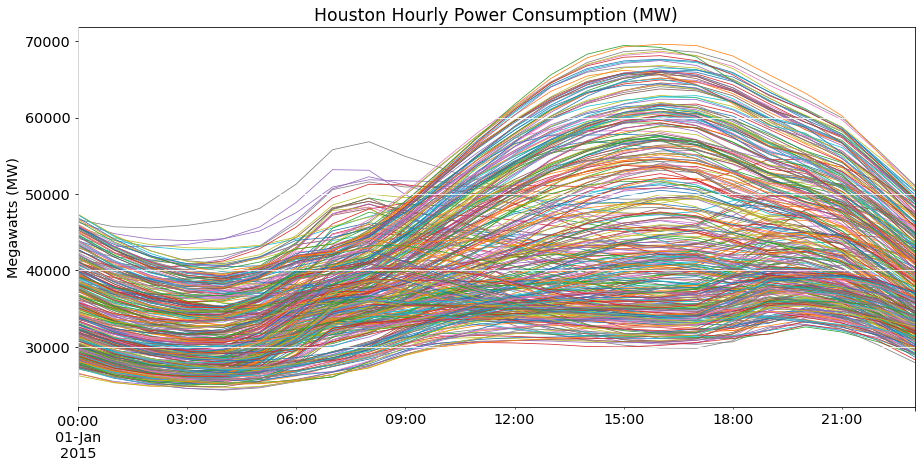

In [92]:
fig, ax = plt.subplots()
hours = mdates.HourLocator()
time_fmt = mdates.DateFormatter('%H:%M')

df_2015_hours.plot(legend=None, ax=ax)
ax.set_title('Houston Hourly Power Consumption (MW)')
ax.set_ylabel('Megawatts (MW)')

In [122]:
df_2015_week_df = df_2015[['day_of_week', 'week_of_year', 'daily_peak']]
df_2015_week_df = df_2015_week_df.drop_duplicates()
df_2015_week_df.head()

,day_of_week,week_of_year,daily_peak
2015-01-01,3,1,45777.740659
2015-01-02,4,1,44385.888601
2015-01-03,5,1,39735.619346
2015-01-04,6,1,44802.050521
2015-01-05,0,2,52269.436394


In [123]:
df_2015_week = df_2015_week_df.pivot(index='day_of_week', columns='week_of_year', values='daily_peak')
df_2015_week.index = df_2015_week_df.loc['2015-01-01':'2015-01-07'].index

In [126]:
df_2015_week.head()

week_of_year,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
2015-01-01,NaN,52269.436394,48434.609829,39997.998647,42909.918628,47622.444711,36640.981093,47337.820397,54549.725564,46255.425300,...,37671.907156,39218.840031,37532.146241,40508.693881,40300.463834,40524.522565,39922.461969,38793.090579,37612.112652,44921.880310
2015-01-02,NaN,48101.955697,49889.280248,39669.091727,39371.583422,46021.013877,36081.353472,49062.216248,51867.832357,41653.648311,...,40802.569363,39864.731800,39356.246519,36471.580995,36543.841637,40103.900227,38636.843151,38587.417864,37865.098458,43227.630626
2015-01-03,NaN,51390.590368,49763.912269,38736.311717,37132.822808,43847.780965,36124.729127,48257.931635,49024.131404,47144.696486,...,41007.043776,41197.258587,43713.227698,36191.574071,37188.161883,40907.697057,38067.330797,39080.356556,37764.671804,40322.717730
2015-01-04,45777.740659,56847.502431,48732.899171,46741.563037,36426.248718,47259.842632,37929.803735,44672.102165,48313.388811,51285.601771,...,40312.940459,44923.474640,36425.217826,36553.950869,36806.801465,42677.950848,38374.703976,42585.926129,36959.632174,40520.206772
2015-01-05,44385.888601,52457.908512,49453.135881,45665.536971,37619.624226,45715.227653,40870.525492,36039.067270,52188.272044,53190.375171,...,38566.341341,39041.405896,34585.864802,35463.305550,38869.444308,42557.078775,38778.584567,44230.261163,35027.634180,NaN


Text(0, 0.5, 'Megawatts (MW)')

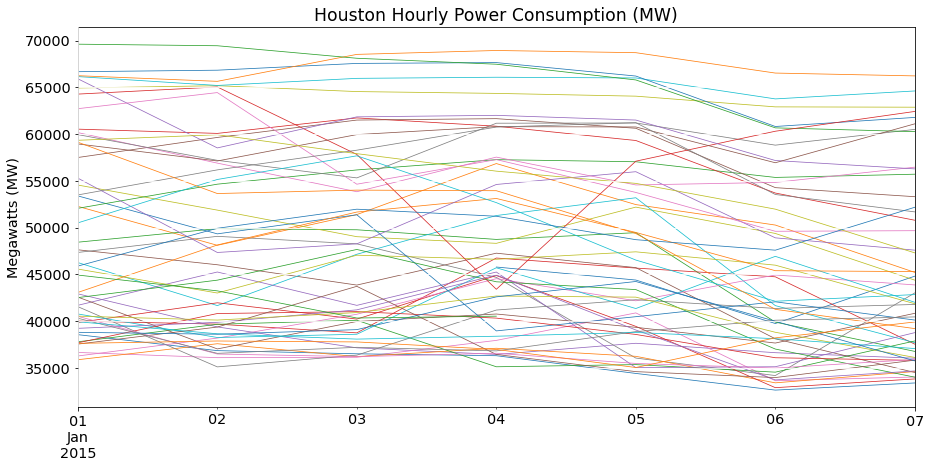

In [127]:
fig, ax = plt.subplots()

df_2015_week.plot(legend=None, ax=ax)
ax.set_title('Houston Weekly Power Consumption (MW)')
ax.set_ylabel('Megawatts (MW)')

In [130]:
df_2015_week_hour = df_2015.pivot_table(index='hour_of_day', columns = 'day_of_week',
                                  values='hourly_demand', aggfunc='mean')
df_2015_week_hour.index = df_2015.loc['2015-01-01'].index
df_2015_week_hour.head()

day_of_week,0,1,2,3,4,5,6
2015-01-01 00:00:00,34122.930781,35387.128717,34947.329909,35406.292790,35898.715720,35603.228228,34280.881957
2015-01-01 01:00:00,32434.242178,33555.272724,33143.494379,33613.267967,34070.776673,33796.975155,32522.926443
2015-01-01 02:00:00,31450.982148,32454.026714,32056.803006,32538.970736,32957.802148,32567.601421,31285.106287
2015-01-01 03:00:00,31046.135926,31894.543694,31501.946476,32000.008227,32384.803103,31808.248232,30484.725272
2015-01-01 04:00:00,31307.061328,32007.294806,31629.298936,32126.313624,32438.874466,31481.133099,30068.432595


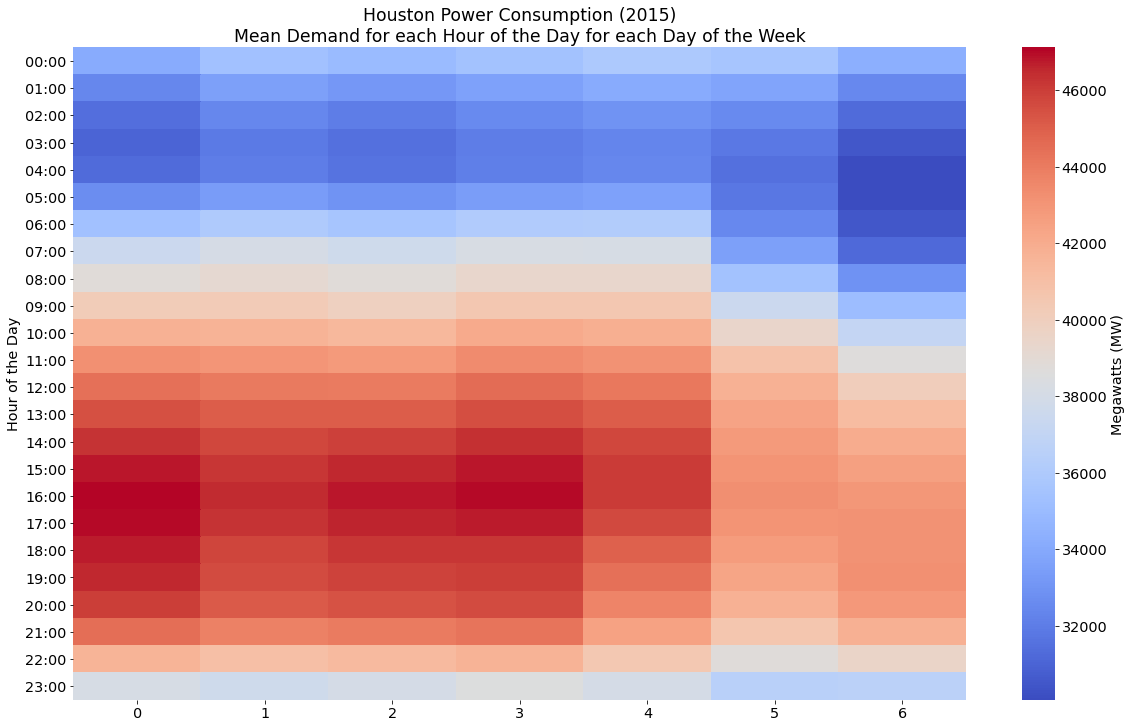

In [139]:
fig, ax = plt.subplots(frameon=False, figsize=(20,12))

ax = sns.heatmap(ax=ax, data = df_2015_week_hour,
                 cmap='coolwarm',
                 cbar_kws={'label': 'Megawatts (MW)'})

ax.set_yticklabels([i.strftime("%H:%M") for i in df_2015_week_hour.index], rotation=0)
ax.set_ylabel('Hour of the Day')
ax.set_xlabel('')
ax.set_title('Houston Power Consumption (2015)\nMean Demand for each Hour of the Day for each Day of the Week')
plt.show();

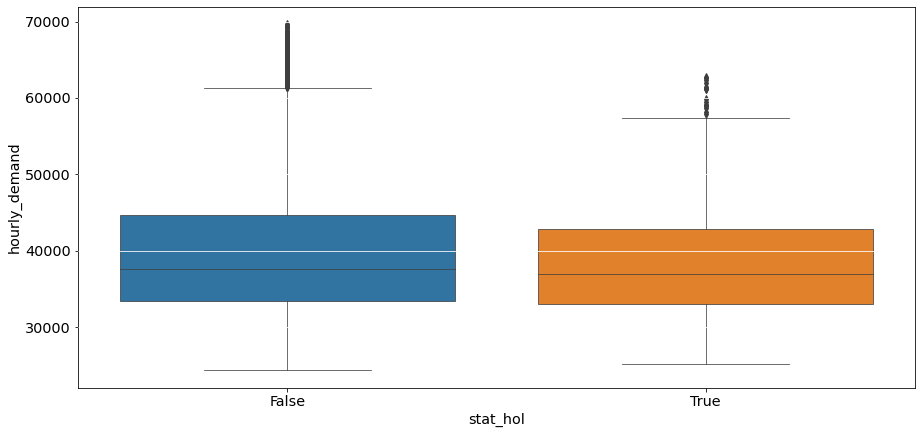

In [154]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(x= df_2015['stat_hol'], y = df_2015['hourly_demand'], ax=ax)
plt.show();

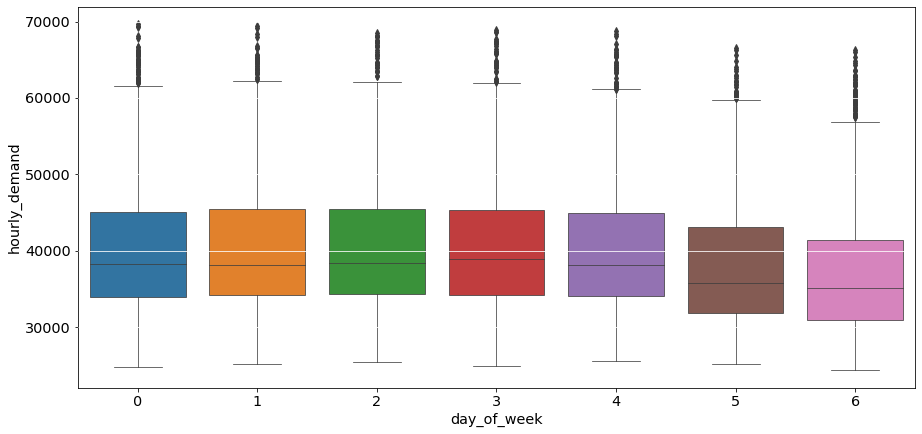

In [155]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(x= df_2015['day_of_week'], y = df_2015['hourly_demand'], ax=ax)
plt.show();

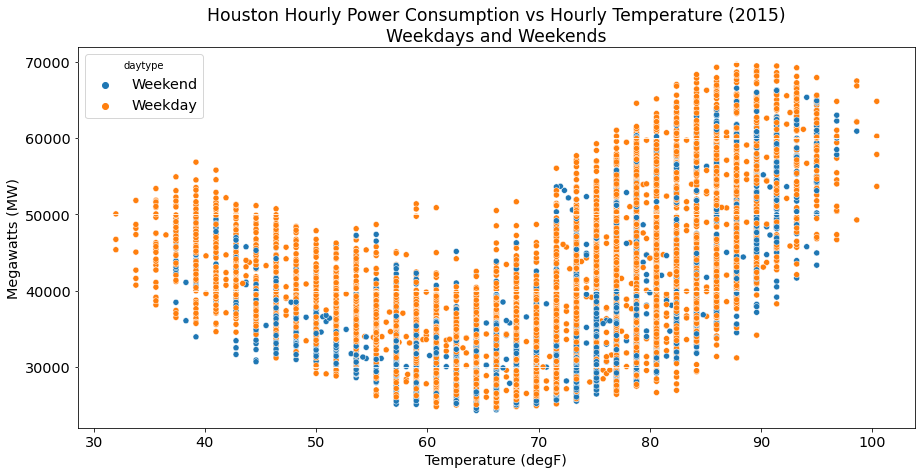

In [159]:
fig, ax = plt.subplots()
sns.scatterplot(x="temp", y="hourly_demand",
                hue="daytype", hue_order=['Weekend', 'Weekday'],
                data=df_2015, ax=ax)
ax.set_ylabel('Megawatts (MW)')
ax.set_xlabel('Temperature (degF)')
ax.set_title('Houston Hourly Power Consumption vs Hourly Temperature (2015)\nWeekdays and Weekends')
plt.show();

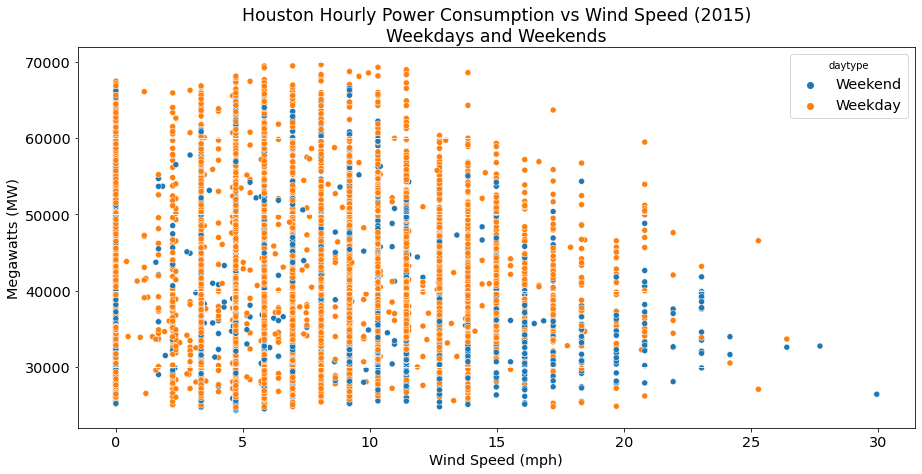

In [163]:
fig, ax = plt.subplots()
sns.scatterplot(x="wspd", y="hourly_demand",
                hue="daytype", hue_order=['Weekend', 'Weekday'],
                data=df_2015, ax=ax)
ax.set_ylabel('Megawatts (MW)')
ax.set_xlabel('Wind Speed (mph)')
ax.set_title('Houston Hourly Power Consumption vs Wind Speed (2015)\nWeekdays and Weekends')
plt.show();